In [36]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [37]:
df.drop(["Name","Sex","Siblings/Spouses Aboard","Parents/Children Aboard"],axis = 1,inplace = True)
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Survived'],axis = 1),df['Survived'],test_size = 0.2,random_state = 42)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred = knn.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import numpy as np
#The ravel() method is used to flatten the resulting matrix to a 1-dimensional array.
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
def accuracy(tp,tn,fp,fn):
    return (tp+tn)/(tp+tn+fp+fn)

def precision(tp, fp):
    return tp / (tp + fp)

def recall(tp, fn):
    return tp / (tp + fn)

def f1_scoresssss(tp, fp, fn):
    p = precision(tp, fp)
    r = recall(tp, fn)
    return 2 * (p * r) / (p + r)

def mcc(tp, tn, fp, fn):
    num = (tp * tn) - (fp * fn)
    denom = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return num / denom

def specificity(tn, fp):
    return tn / (tn + fp)

def npv(tn, fn):
    return tn / (tn + fn)

acc = accuracy(tp,tn,fp,fn)
prec = precision(tp, fp)
rec = recall(tp, fn)
f1 = f1_scoresssss(tp,fp,fn)
mcc = mcc(tp, tn, fp, fn)
spec = specificity(tn, fp)
npv = npv(tn, fn)

print("Accuracy:", acc)
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'Specificity: {spec:.4f}')
print(f'Negative Predictive Value: {npv:.4f}')


Accuracy: 0.6460674157303371
Precision: 0.5345
Recall: 0.4627
F1-Score: 0.4960
MCC: 0.2268
Specificity: 0.7568
Negative Predictive Value: 0.7000


In [42]:
accu = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accu)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6460674157303371
Precision: 0.5344827586206896
Recall: 0.4626865671641791
F1-score: 0.49599999999999994


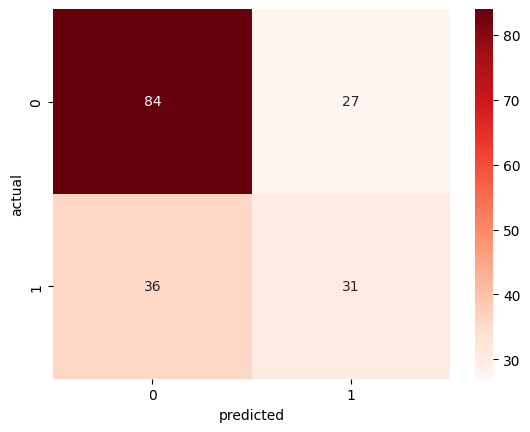

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Reds')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

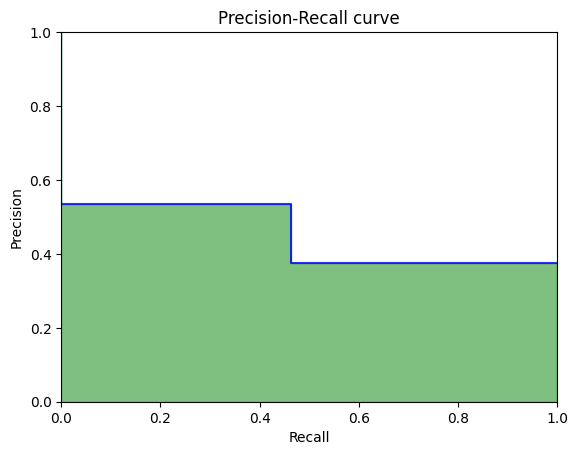

In [73]:
from sklearn.metrics import precision_recall_curve
pre,rec,_ = precision_recall_curve(y_test,y_pred)
plt.step(rec, pre, color='blue', alpha=0.8, where='post')
plt.fill_between(rec, pre, alpha=0.5, color='g', step='post')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()

sklearn ROC AUC Score A: 0.609721661960468


Text(0.5, 1.0, 'Receiver operating characteristic example')

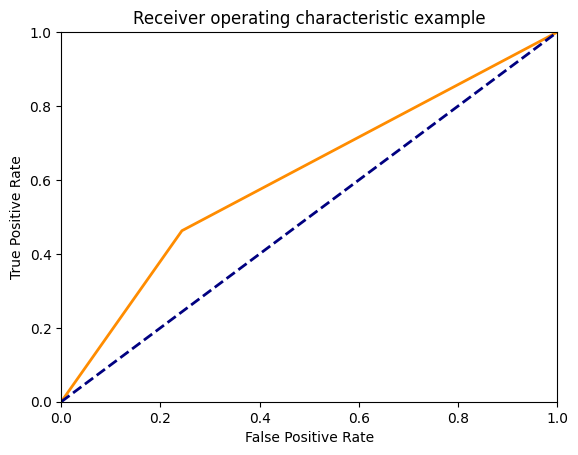

In [77]:
from sklearn.metrics import roc_curve,auc
print("sklearn ROC AUC Score A:", auc(fpr,tpr))
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #center line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')